# Площадь под графиком и управление порогом

In [1]:
# Импорт необходимых библиотек
from sklearn.datasets import load_breast_cancer  # Импорт функции для загрузки датасета о раке груди
from sklearn.model_selection import train_test_split  # Импорт функции для разделения данных на обучающий и тестовый наборы
from sklearn.linear_model import LogisticRegression  # Импорт модели логистической регрессии
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # Импорт метрик для оценки производительности модели
import numpy as np  # Импорт библиотеки NumPy для работы с массивами
import matplotlib.pyplot as plt  # Импорт библиотеки Matplotlib для визуализации данных
from sklearn.datasets import make_classification  # Импорт функции make_classification для генерации датасета
from sklearn.model_selection import train_test_split  # Импорт функции train_test_split для разделения выборки
from sklearn.linear_model import LogisticRegression  # Импорт модели логистической регрессии
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report  # Импорт метрик и кривых
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

In [ ]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[4.02731514e-03, 9.95972685e-01],
       [2.00515726e-03, 9.97994843e-01],
       [9.94701169e-01, 5.29883066e-03],
       [8.47625806e-01, 1.52374194e-01],
       [1.66665036e-03, 9.98333350e-01],
       [4.99938552e-01, 5.00061448e-01],
       [9.80236861e-01, 1.97631392e-02],
       [9.76536616e-01, 2.34633843e-02],
       [1.79993032e-02, 9.82000697e-01],
       [2.93534820e-01, 7.06465180e-01],
       [9.95837980e-01, 4.16201961e-03],
       [2.53553400e-01, 7.46446600e-01],
       [9.92334325e-01, 7.66567488e-03],
       [3.80412811e-02, 9.61958719e-01],
       [6.47854323e-02, 9.35214568e-01],
       [1.92346446e-01, 8.07653554e-01],
       [8.55196114e-01, 1.44803886e-01],
       [4.34676792e-02, 9.56532321e-01],
       [8.43042493e-01, 1.56957507e-01],
       [5.50912415e-02, 9.44908759e-01],
       [1.32992380e-01, 8.67007620e-01],
       [5.89717936e-01, 4.10282064e-01],
       [9.79518433e-01, 2.04815673e-02],
       [3.32906248e-01, 6.67093752e-01],
       [9.957366

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

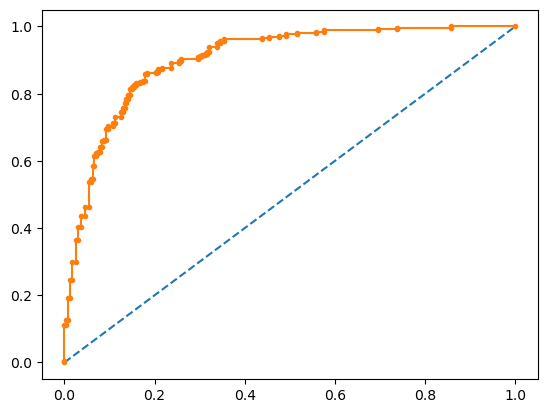

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9028205128205128

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

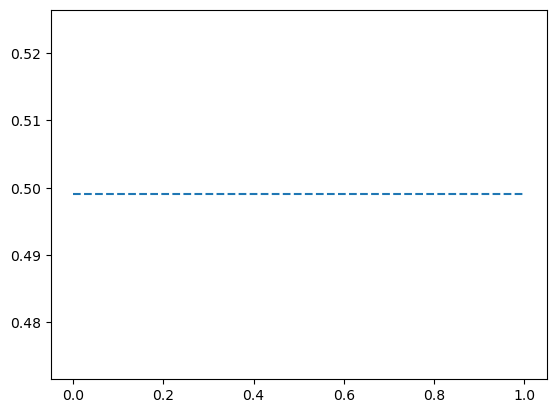

In [ ]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

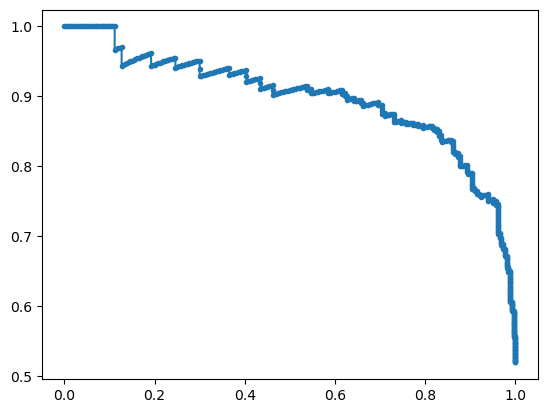

In [ ]:
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
auc(recall, precision)

0.8977244980325834

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



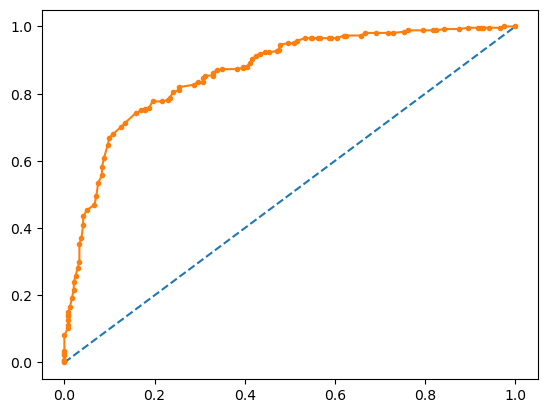

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.8630608974358974

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

In [ ]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       493
           1       0.00      0.00      0.00         7

    accuracy                           0.99       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.99      0.98       500



C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


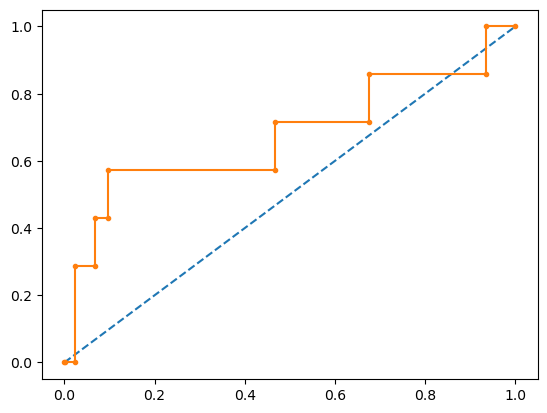

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

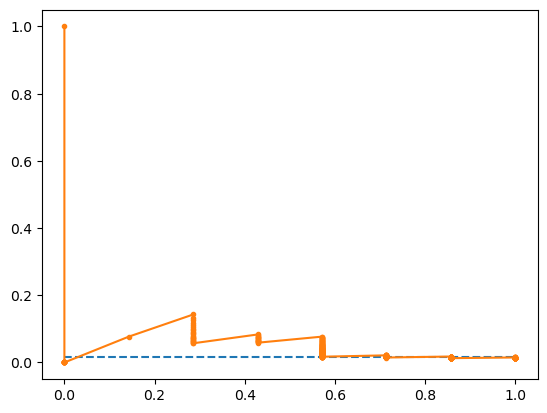

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

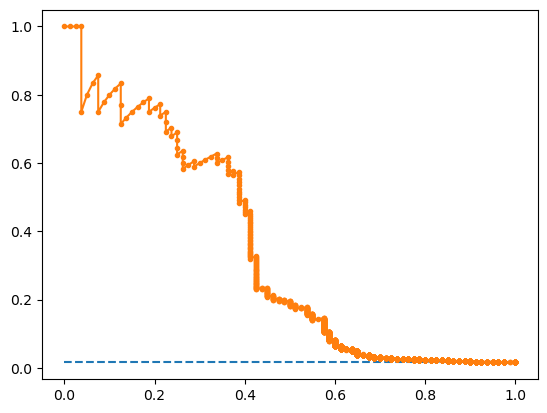

In [ ]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [ ]:
from numpy import argmax
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]

0.17158193645752504

In [ ]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]

0.17158193645752504

In [ ]:
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.171582, F-Score=0.463


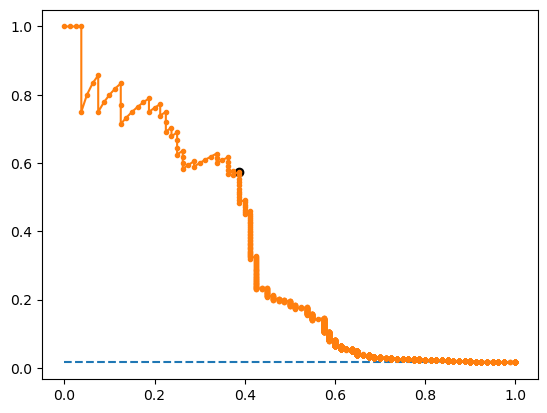

In [ ]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [ ]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.57      0.38      0.45        80

    accuracy                           0.99      5000
   macro avg       0.78      0.69      0.72      5000
weighted avg       0.98      0.99      0.98      5000



In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.78      0.09      0.16        80

    accuracy                           0.98      5000
   macro avg       0.88      0.54      0.57      5000
weighted avg       0.98      0.98      0.98      5000



# Задания для самостоятельного выполнения

# №1 Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.

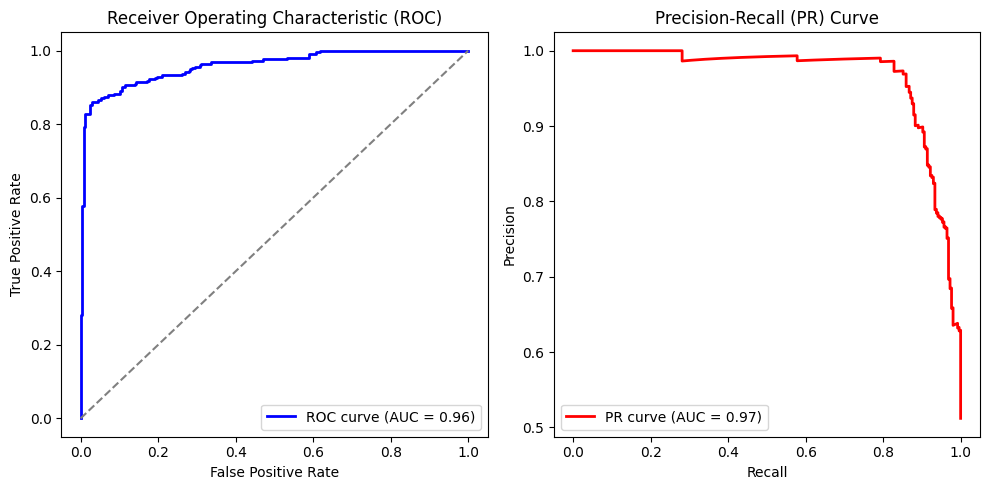

In [2]:
# Генерация двумерного датасета для бинарной классификации
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2,
                           n_clusters_per_class=1, n_informative=2, n_redundant=0,
                           random_state=42)

# Разделение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)








# Получение вероятностей классов для тестовой выборки
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Построение кривых ROC и PR
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Вычисление площадей под кривыми для оценки эффективности модели классификации
roc_auc = auc(fpr, tpr)
pr_auc = auc(recall, precision)

# Визуализация кривых ROC и PR
plt.figure(figsize=(10, 5))

# ROC curve oтношение между долей ложных срабатываний и долей истинных срабатываний
plt.subplot(1, 2, 1) # местоположение графика
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})') # сама кривая, fpr-x, tpr-y
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # линией случайного угадывания (predict)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# PR curve  oтношение между точностью (Precision) и полнотой (Recall)
plt.subplot(1, 2, 2) # местоположение графика
plt.plot(recall, precision, color='red', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()




1. ROC Curve (Кривая ROC):
   - Площадь под кривой ROC (AUC) составляет 0.96, что указывает на высокую способность модели различать между классами.
   - Чем ближе кривая к левому верхнему углу, тем лучше производительность модели. В данном случае кривая находится близко к верхнему левому углу, что говорит о хорошей способности модели разделять классы.

2. PR Curve (Кривая Precision-Recall):
   - Площадь под кривой PR (AUC) составляет 0.97, что также указывает на высокую способность модели различать между классами.
   - Кривая Precision-Recall показывает отношение между точностью (precision) и полнотой (recall) модели. Чем ближе кривая к верхнему правому углу, тем лучше производительность модели. В данном случае кривая находится близко к верхнему правому углу, что указывает на высокую точность и полноту модели.


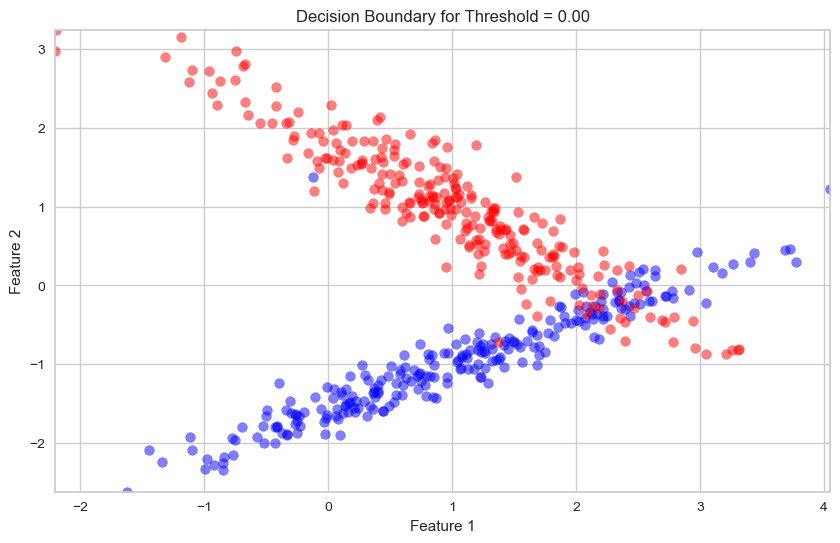

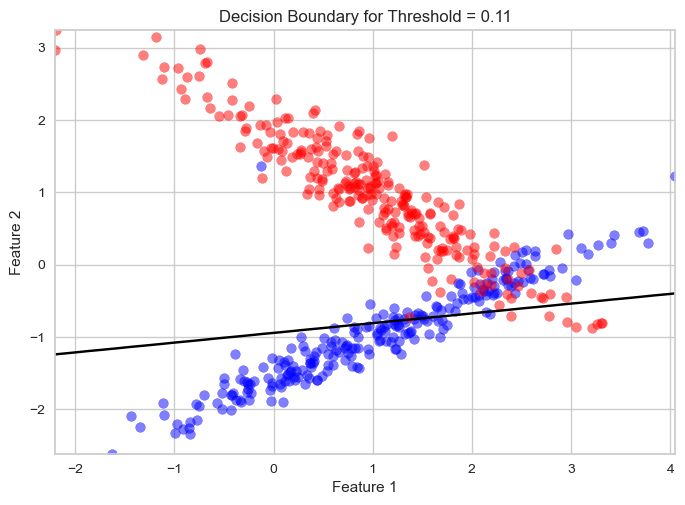

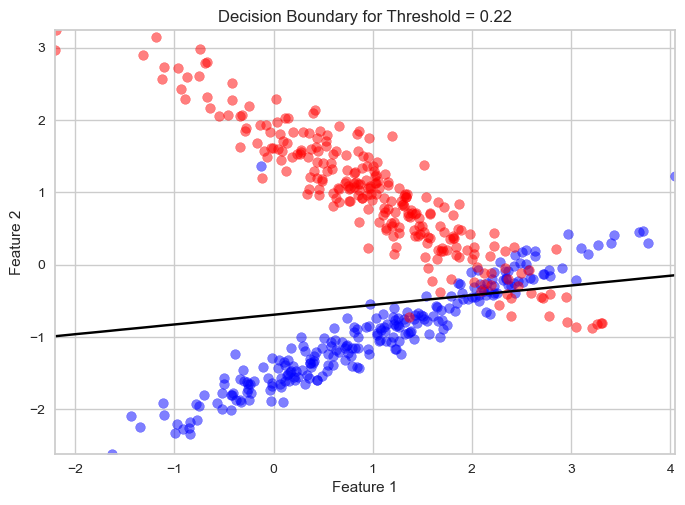

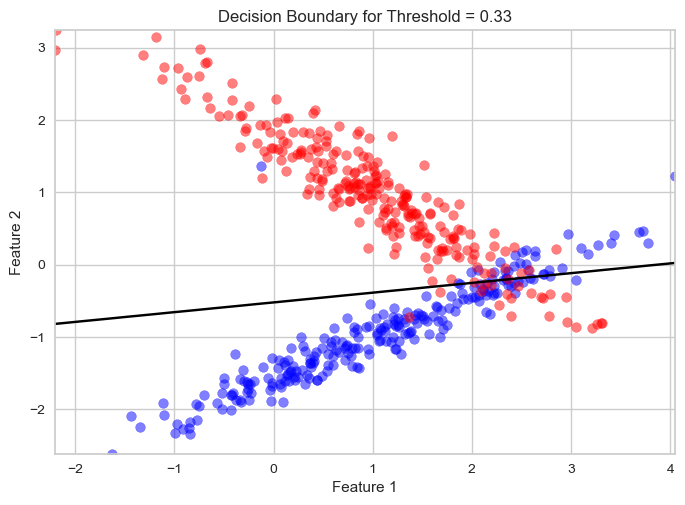

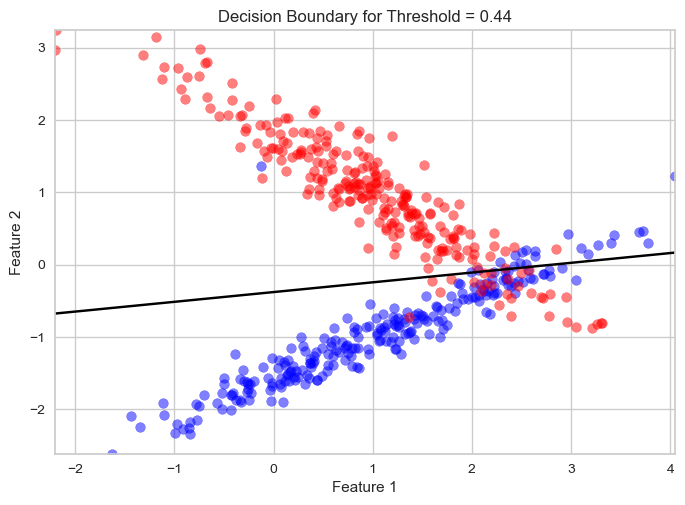

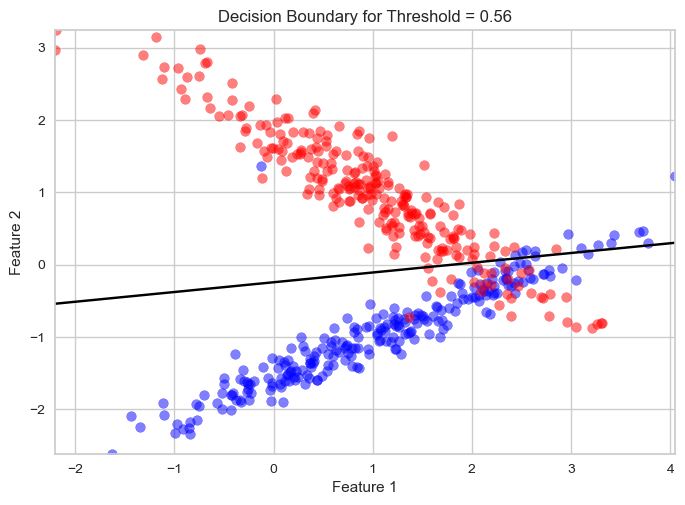

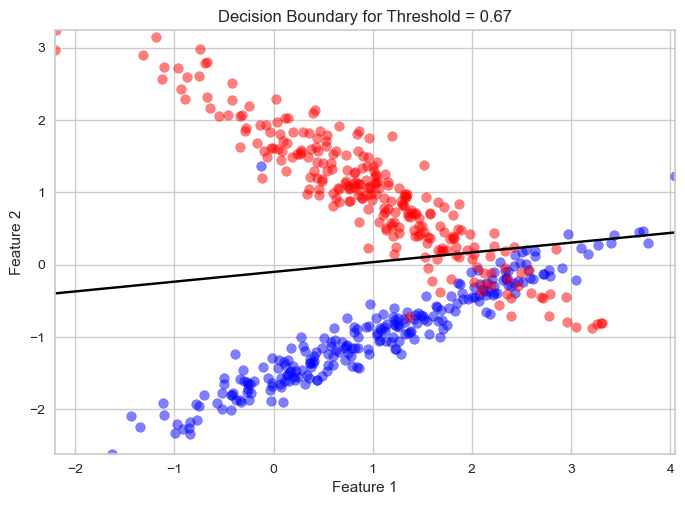

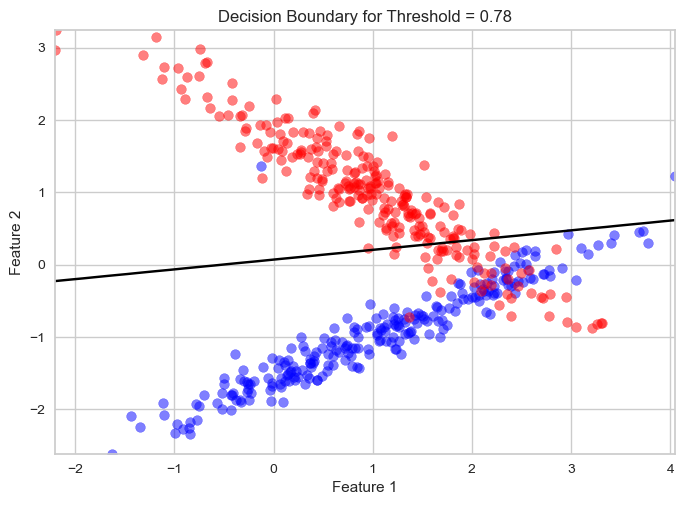

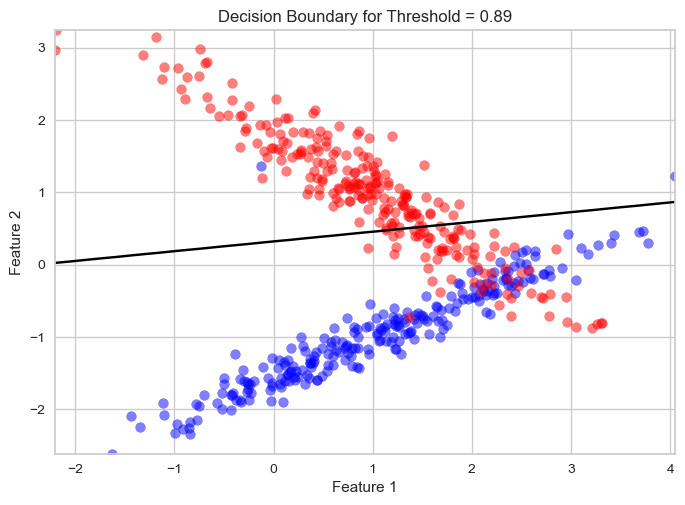

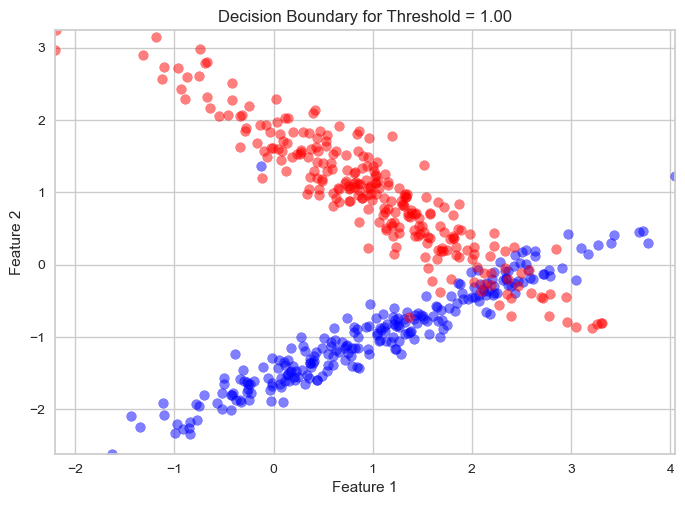

In [ ]:
# Зададим значения порога
thresholds = np.linspace(0, 1, 10)  # Генерация равномерно распределенных значений порога от 0 до 1

# Визуализация изменения границы принятия решений
plt.figure(figsize=(10, 6))
for threshold in thresholds:
    plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='blue', alpha=0.5)  # Графическое отображение точек тестовой выборки класса 0
    plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='red', alpha=0.5)  # Графическое отображение точек тестовой выборки класса 1

    xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100),
                         np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100))  # Создание сетки точек для построения контура решения

    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  # Получение вероятностей класса 1 для всех точек на сетке
    Z = Z.reshape(xx.shape)  # Изменение формы массива вероятностей

    plt.contour(xx, yy, Z, levels=[threshold], colors='black')  # Построение контура решения для определенного значения порога
    plt.title(f'Decision Boundary for Threshold = {threshold:.2f}')
    plt.xlabel('Feature 1')  # Подпись оси x
    plt.ylabel('Feature 2')  # Подпись оси y
    plt.xlim(X_test[:, 0].min(), X_test[:, 0].max())  # Установка пределов оси x
    plt.ylim(X_test[:, 1].min(), X_test[:, 1].max())  # Установка пределов оси y
    plt.show()


# №2 Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.

In [ ]:
data = load_breast_cancer()  # Загрузка датасета о раке груди
# Подготовка данных
X = data.data  # Определение признаков (X)
y = data.target  # Определение целевой переменной (y)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Разделение данных на обучающий и тестовый наборы

# Обучение модели логистической регрессии
model = LogisticRegression(max_iter=10000)  # Создание модели логистической регрессии
model.fit(X_train, y_train)  # Обучение модели на обучающем наборе данных







# Оценка производительности модели
y_pred = model.predict(X_test)  # Предсказание меток классов на тестовом наборе данных
accuracy = accuracy_score(y_test, y_pred)  # Вычисление accuracy
precision = precision_score(y_test, y_pred)  # Вычисление precision
recall = recall_score(y_test, y_pred)  # Вычисление recall
f1 = f1_score(y_test, y_pred)  # Вычисление F1-меры
roc_auc = roc_auc_score(y_test, y_pred)  # Вычисление ROC AUC

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1 Score: 0.9655172413793103
ROC AUC Score: 0.9464461185718965


- Accuracy (точность) равна 0.956, что означает, что примерно 95.6% всех предсказаний модели были правильными.

- Precision (точность) равна 0.946, что означает, что из всех объектов, которые модель предсказала как положительные, около 94.6% действительно являются положительными.

- Recall (полнота) равен 0.986, что означает, что модель обнаружила около 98.6% всех реальных положительных объектов в данных.

- F1 Score равен 0.966, это гармоническое среднее между Precision и Recall, и он учитывает обе эти метрики. Высокое значение F1-меры указывает на хорошее сбалансированное соотношение между Precision и Recall.

- ROC AUC Score равен 0.946, это площадь под кривой ROC (Receiver Operating Characteristic). Эта метрика оценивает качество бинарной классификации, учитывая компромисс между True Positive Rate (чувствительностью) и False Positive Rate (специфичностью). Высокое значение ROC AUC говорит о хорошей разделимости классов моделью.

1. **Accuracy (точность)**: Это доля правильных предсказаний, сделанных моделью по всем объектам. Формула для вычисления точности:

   $$
   \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
   $$

2. **Precision (точность)**: Это доля правильно предсказанных положительных объектов среди всех объектов, которые модель предсказала как положительные. Формула для вычисления точности:

   $$
   \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
   $$

3. **Recall (полнота)**: Это доля правильно предсказанных положительных объектов среди всех реальных положительных объектов в данных. Формула для вычисления полноты:

   $$
   \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
   $$

4. **F1 Score**: Это гармоническое среднее между Precision и Recall. F1 Score учитывает как точность, так и полноту модели. Формула для вычисления F1 Score:

   $$
   \text{F1 Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

5. **ROC AUC Score**: Это площадь под кривой ROC (Receiver Operating Characteristic). ROC кривая отображает отношение между True Positive Rate (чувствительностью) и False Positive Rate (специфичностью) для различных порогов классификации. ROC AUC Score измеряет общую дискриминативную способность модели. Значение ROC AUC близко к 1 указывает на хорошую разделимость классов моделью.


# №3 В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.

In [ ]:
# Шаг 1: Загрузка и подготовка данных
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Шаг 2: Обучение модели логистической регрессии
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Шаг 3: Получение вероятностей принадлежности к положительному классу
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Шаг 4: Вычисление значений TPR и FPR для различных порогов
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Вычисление среднего геометрического между TPR и FPR
geometric_mean = np.sqrt(tpr * (1 - fpr))

# Выбор порога с максимальным значением среднего геометрического
best_threshold_index = np.argmax(geometric_mean)
best_threshold = thresholds[best_threshold_index]

# Шаг 5: Оценка производительности модели с использованием выбранного порога
y_pred = (y_pred_proba >= best_threshold).astype(int)

# Вывод результатов
print("Best Threshold:", best_threshold)
print("Performance with Best Threshold:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Best Threshold: 0.851351465242515
Performance with Best Threshold:
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.971830985915493
F1 Score: 0.9857142857142858


# №4 При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.

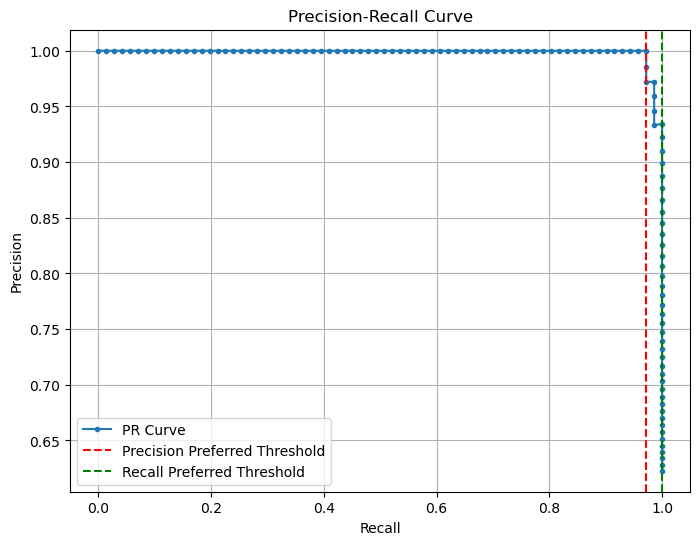

Precision Preferred Threshold: 0.851351465242515
Performance with Precision Preferred Threshold:
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.971830985915493
F1 Score: 0.9857142857142858

Recall Preferred Threshold: 8.0628927489411e-25
Performance with Recall Preferred Threshold:
Accuracy: 0.6228070175438597
Precision: 0.6228070175438597
Recall: 1.0
F1 Score: 0.7675675675675676


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Шаг 1: Получение значений precision, recall и thresholds для PR-кривой
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Шаг 2: Выбор порога с преимуществом precision
precision_preferred_threshold = thresholds[np.argmax(precision)]

# Оценка производительности модели с использованием выбранного порога с преимуществом precision
y_pred_precision = (y_pred_proba >= precision_preferred_threshold).astype(int)
precision_accuracy = accuracy_score(y_test, y_pred_precision)
precision_precision = precision_score(y_test, y_pred_precision)
precision_recall = recall_score(y_test, y_pred_precision)
precision_f1 = f1_score(y_test, y_pred_precision)

# Шаг 3: Выбор порога с преимуществом recall
recall_preferred_threshold = thresholds[np.argmax(recall)]

# Оценка производительности модели с использованием выбранного порога с преимуществом recall
y_pred_recall = (y_pred_proba >= recall_preferred_threshold).astype(int)
recall_accuracy = accuracy_score(y_test, y_pred_recall)
recall_precision = precision_score(y_test, y_pred_recall)
recall_recall = recall_score(y_test, y_pred_recall)
recall_f1 = f1_score(y_test, y_pred_recall)

# Шаг 4: Изображение полученных порогов на графике PR-кривой
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.axvline(x=recall[np.argmax(precision)], color='r', linestyle='--', label='Precision Preferred Threshold')
plt.axvline(x=recall[np.argmax(recall)], color='g', linestyle='--', label='Recall Preferred Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Вывод результатов
print("Precision Preferred Threshold:", precision_preferred_threshold)
print("Performance with Precision Preferred Threshold:")
print("Accuracy:", precision_accuracy)
print("Precision:", precision_precision)
print("Recall:", precision_recall)
print("F1 Score:", precision_f1)

print("\nRecall Preferred Threshold:", recall_preferred_threshold)
print("Performance with Recall Preferred Threshold:")
print("Accuracy:", recall_accuracy)
print("Precision:", recall_precision)
print("Recall:", recall_recall)
print("F1 Score:", recall_f1)


# №5 Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.

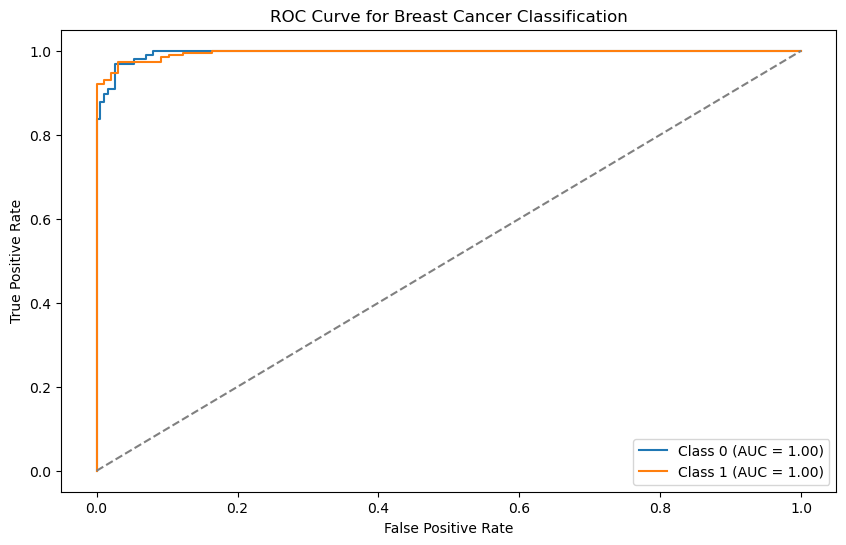

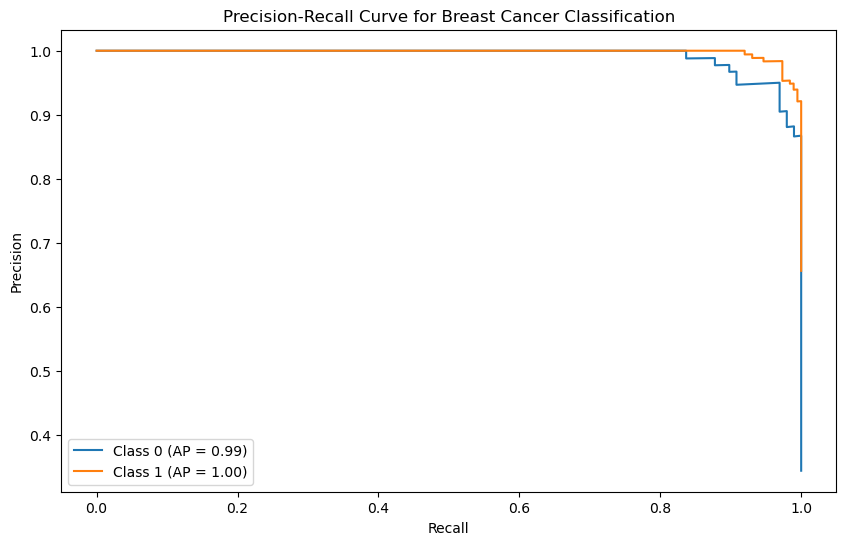

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Загрузим датасет о раке груди
data = load_breast_cancer()
X = data.data
y = data.target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Инициализируем и обучим модель логистической регрессии
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Получим вероятности принадлежности к классам для каждого класса
y_pred_proba = model.predict_proba(X_test)

# Построим ROC-кривые для каждого класса
plt.figure(figsize=(10, 6))
for i in range(len(data.target_names)):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()

# Построим PR-кривые для каждого класса
plt.figure(figsize=(10, 6))
for i in range(len(data.target_names)):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, i], pos_label=i)
    avg_precision = average_precision_score(y_test, y_pred_proba[:, i], pos_label=i)
    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Breast Cancer Classification')
plt.legend()
plt.show()


# №6 Используйте для построения кривых библиотеку yellowbrick.

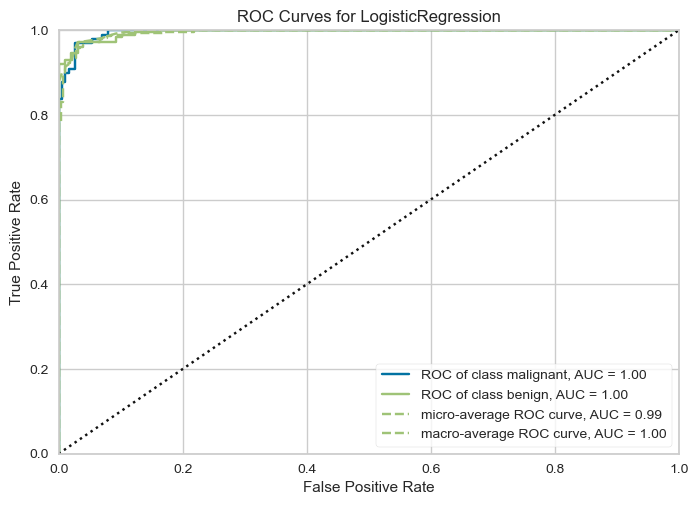

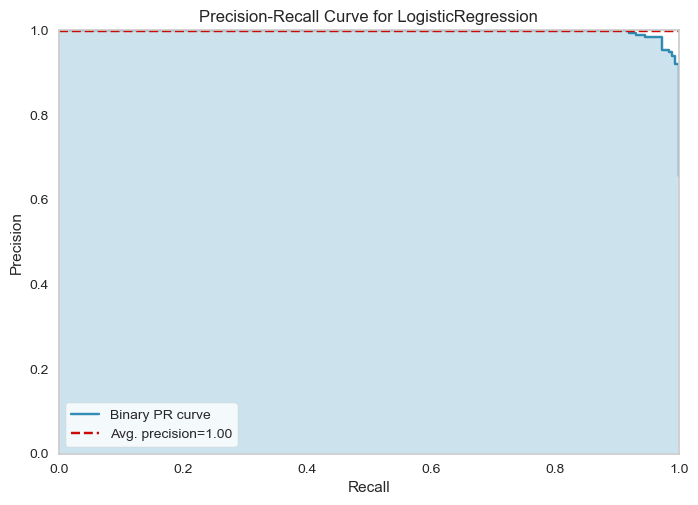

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve

# Загрузим датасет о раке груди
data = load_breast_cancer()
X = data.data
y = data.target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Инициализируем модель логистической регрессии
model = LogisticRegression(max_iter=10000)

# Инициализируем и настроим визуализатор ROC-кривой
roc_viz = ROCAUC(model, classes=data.target_names)
roc_viz.fit(X_train, y_train)
roc_viz.score(X_test, y_test)
roc_viz.show()

# Инициализируем и настроим визуализатор PR-кривой
pr_viz = PrecisionRecallCurve(model, classes=data.target_names)
pr_viz.fit(X_train, y_train)
pr_viz.score(X_test, y_test)
pr_viz.show()
